In [ ]:
!pip install pytesseract
!pip install pdf2image
!pip install PyPDF2
!apt-get install poppler-utils 
!apt install tesseract-ocr
!apt install libtesseract-dev

In [ ]:
#coding: utf-8

import zipfile
import pytesseract
import cv2 as cv
import numpy as np
import io
import pdf2image
import PyPDF2
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow
from google.colab import drive 

drive.mount('/content/drive')
%cd '/content/drive/My Drive/Projets/CV_Journaux'

# Loading default classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade_side = cv.CascadeClassifier('haarcascade_profileface.xml')

def pdf_extract(filepath, keyword):
  """ This function extract all faces from each newspaper pages where a given keyword is found """
  
  # Size of faces on contact_sheet
  size_faces = 100

  pdf = PyPDF2.PdfFileReader(open(filepath, 'rb'))
  images = pdf2image.convert_from_path(filepath)

  newspaper = []

  for page, img in zip(pdf.pages, images): 

      strings = page.extractText().lower()
      
      # If keyword is found in the page, we look for faces
      if keyword.lower() in strings:

          print('Keyword found in page N° '+ str(pdf.getPageNumber(page) + 1))
          img_array = np.array(img)
          img_cv = img_array[:, :, ::-1].copy() 
          img_cv_bw = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)

          faces = face_cascade.detectMultiScale(img_cv_bw, scaleFactor=1.25, minNeighbors=3, minSize=(100,100))
          
          # If at least one face is found, we create a contact sheet on which we paste all faces detected
          if len(faces) > 0:

              contact_sheet = Image.new(mode='RGB', size=(5 * size_faces, (1 + (len(faces)-1) // 5) * size_faces))
              n = 1
              for x,y,w,h in faces:

                  face = img.crop((x, y, x+w, y+h))
                  if face.width > size_faces or face.height > size_faces:
                      face.thumbnail((size_faces, size_faces), Image.ANTIALIAS)
                  contact_sheet.paste(face, box=(((n-1) - ((n-1) // 5)*5)*size_faces,((n - 1)//5)*size_faces))
                  n = n+1
              display(contact_sheet)

          else:
              print('No faces detected on this page.')
          

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Projets/CV_Journaux


Keyword found in page N° 1


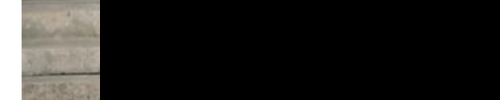

Keyword found in page N° 2


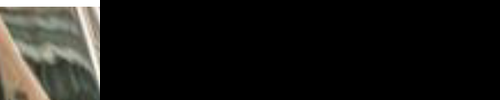

Keyword found in page N° 3


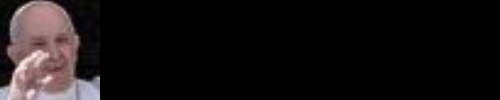

Keyword found in page N° 4
No faces detected on this page.
Keyword found in page N° 5
No faces detected on this page.
Keyword found in page N° 6
No faces detected on this page.
Keyword found in page N° 7


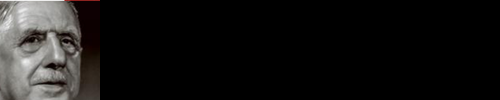

Keyword found in page N° 8
No faces detected on this page.
Keyword found in page N° 9
No faces detected on this page.
Keyword found in page N° 10


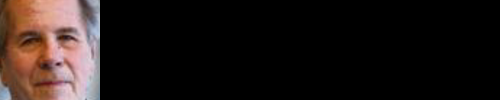

Keyword found in page N° 11


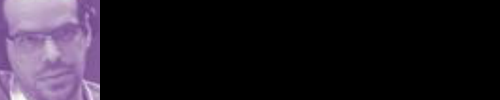

Keyword found in page N° 12
No faces detected on this page.
Keyword found in page N° 14
No faces detected on this page.
Keyword found in page N° 15
No faces detected on this page.
Keyword found in page N° 16


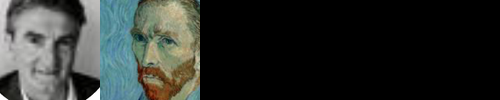

Keyword found in page N° 17
No faces detected on this page.
Keyword found in page N° 18


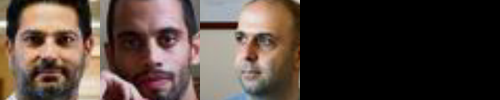

Keyword found in page N° 19


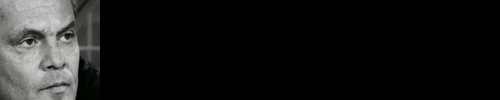

Keyword found in page N° 20


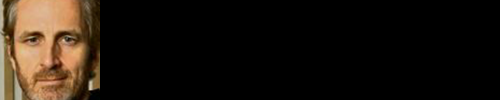

Keyword found in page N° 21
No faces detected on this page.
Keyword found in page N° 22
No faces detected on this page.
Keyword found in page N° 23


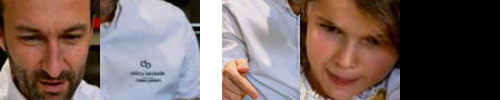

Keyword found in page N° 24
No faces detected on this page.
Keyword found in page N° 25


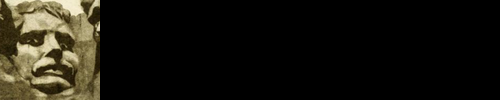

Keyword found in page N° 26
No faces detected on this page.
Keyword found in page N° 27
No faces detected on this page.
Keyword found in page N° 28


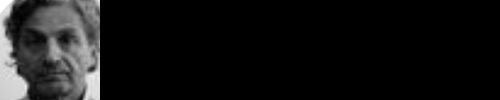

Keyword found in page N° 29
No faces detected on this page.
Keyword found in page N° 30
No faces detected on this page.
Keyword found in page N° 31


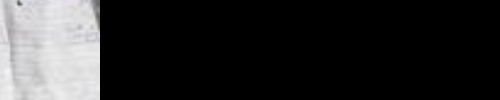

Keyword found in page N° 32


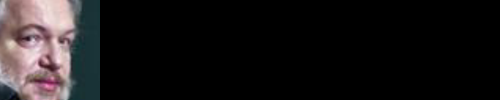

Keyword found in page N° 33
No faces detected on this page.
Keyword found in page N° 34


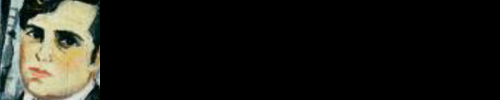

Keyword found in page N° 35


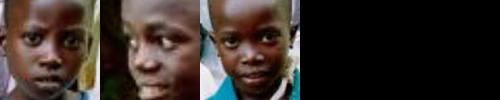

Keyword found in page N° 36


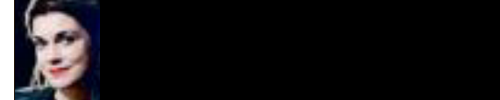

Keyword found in page N° 37
No faces detected on this page.
Keyword found in page N° 38


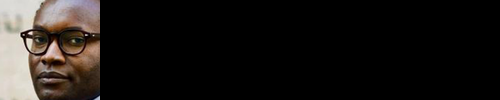

In [ ]:
pdf_extract('Le Monde - 2020-10-23.pdf', keyword='a')